# Supplementary Figure 1: Sequence generation in ring network

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import decomposition
from sklearn.preprocessing import StandardScaler
from collections import defaultdict
import os
import _pickle as cPickle

In [2]:
from submanifolds.ringnet import Plot
from submanifolds.utils import DataManager

## Parameters

In [5]:
# if new experiment is run, need to fill in name of folder here!
exp_data_dir = 'subspace_exp_2025-04-15_08:53:39'
manage = DataManager(exp_data_dir)

In [6]:
rescale_flag = manage.params_to_iterate['rescale']
shift_percent = manage.params_to_iterate['shift_percent']
perc_selectivity = manage.params_to_iterate['p_inh']
seeds = manage.params_to_iterate['seed']
static_parameters = tuple(val[0] for val in manage.params_to_set.values())

In [7]:
parameter_setting = (True, 0, 0, 0) + static_parameters
net = manage.load_data(parameter_setting)

In [8]:
N = net.params.N
T = net.params.T
n_rescale = len(rescale_flag)
n_perc_sel = len(perc_selectivity)
n_shifts = len(shift_percent)
n_seeds = len(seeds)

In [9]:
palette = ['#C47475', '#7F9CB0'] # ['#009E92', '#7F9CB0'] #['#1D7874', '#99A88C']

In [10]:
sns.set_style('ticks')  # seaborn style
ticksize = 21           # set tick font size
labelsize = 24          # set plot label sizes

In [11]:
# figure storage
fig_dir = manage.root + 'figures/supplementary_figure_1/'
if not os.path.isdir(fig_dir):
    os.mkdir(fig_dir)
    print('Created ' + fig_dir)
else:
    print('Directory already exists')
    
save_figs_flag = 1

Directory already exists


### Load eigendecomposition data
Returns data with following shapes (see next cell):

In [12]:
#evals_W = defaultdict(dict) 
#evals_PW = defaultdict(dict) 
#evals_Wr = defaultdict(dict) 

#val_W_max = np.zeros((n_rescale, n_perc_sel, n_shifts, n_seeds))
#val_PW_max = np.zeros((n_rescale, n_perc_sel, n_shifts, n_seeds))
#val_Wr_max = np.zeros((n_rescale, n_perc_sel, n_shifts, n_seeds))

#val_W_argmax = np.zeros((n_rescale, n_perc_sel, n_shifts, n_seeds), dtype=int)
#val_PW_argmax = np.zeros((n_rescale, n_perc_sel, n_shifts, n_seeds), dtype=int)
#val_Wr_argmax = np.zeros((n_rescale, n_perc_sel, n_shifts, n_seeds), dtype=int)

#val_W_max_real = np.zeros((n_rescale, n_perc_sel, n_shifts, n_seeds))
#val_PW_max_real = np.zeros((n_rescale, n_perc_sel, n_shifts, n_seeds))
#val_Wr_max_real = np.zeros((n_rescale, n_perc_sel, n_shifts, n_seeds))

#val_W_max_imag = np.zeros((n_rescale, n_perc_sel, n_shifts, n_seeds))
#val_PW_max_imag = np.zeros((n_rescale, n_perc_sel, n_shifts, n_seeds))
#val_Wr_max_imag = np.zeros((n_rescale, n_perc_sel, n_shifts, n_seeds))

#vec_W_max = 1j * np.zeros((n_rescale, n_perc_sel, n_shifts, n_seeds, N))
#vec_PW_max = 1j * np.zeros((n_rescale, n_perc_sel, n_shifts, n_seeds, N))
#vec_Wr_max = 1j * np.zeros((n_rescale, n_perc_sel, n_shifts, n_seeds, N))

In [13]:
eigendecomposition_data = manage.load_eigendecomposition_data()

for key in eigendecomposition_data.keys():
        exec(key + ' = eigendecomposition_data[key]')
        print('Extracted ' + key)

Extracted evals_W
Extracted evals_PW
Extracted evals_Wr
Extracted val_W_max
Extracted val_PW_max
Extracted val_Wr_max
Extracted val_W_argmax
Extracted val_PW_argmax
Extracted val_Wr_argmax
Extracted val_W_max_real
Extracted val_PW_max_real
Extracted val_Wr_max_real
Extracted val_W_max_imag
Extracted val_PW_max_imag
Extracted val_Wr_max_imag
Extracted vec_W_max
Extracted vec_PW_max
Extracted vec_Wr_max


#### Eigendecomposition parameters

In [14]:
# not rescaled
no_rescale_val = False
no_rescale_ind = rescale_flag.index(no_rescale_val)

# no selective inhibition
no_perc_val = 0
no_perc_ind = np.where(perc_selectivity==no_perc_val)[0][0]

# seed
seed_val = 0
seed_ind = np.where(seeds==seed_val)[0][0]

## Make plots for different shift values

In [15]:
shift_vals = [0,0.01,0.05,0.1,0.15]

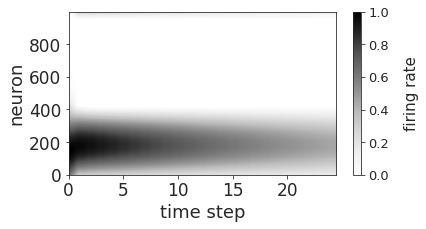

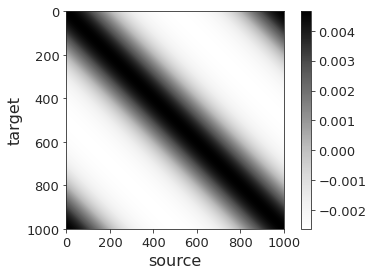

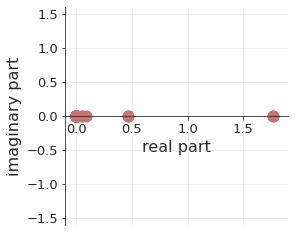

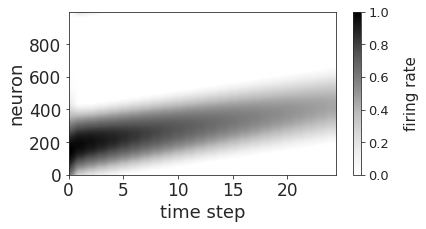

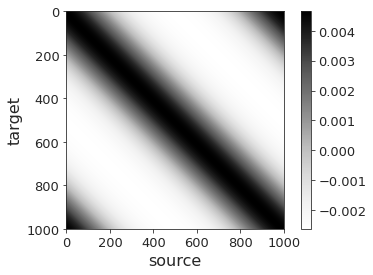

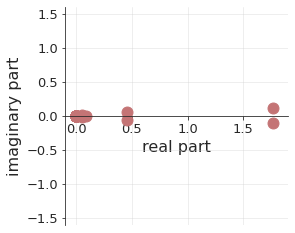

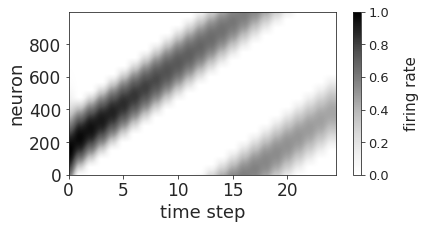

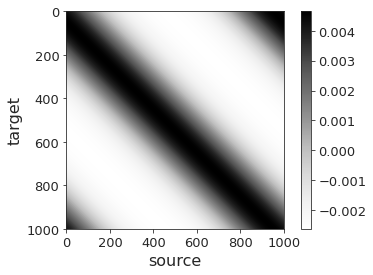

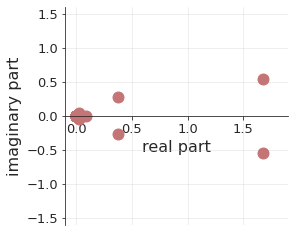

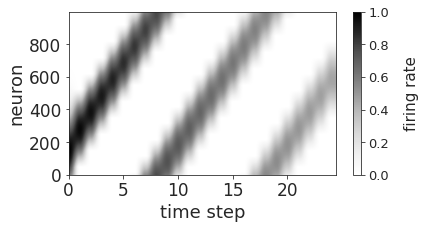

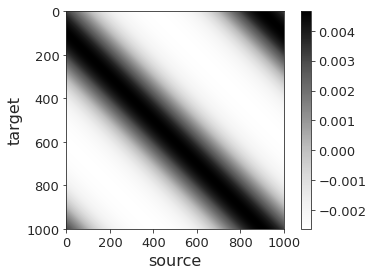

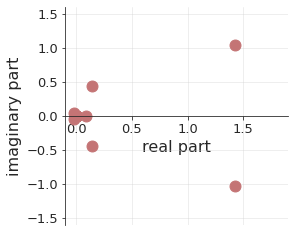

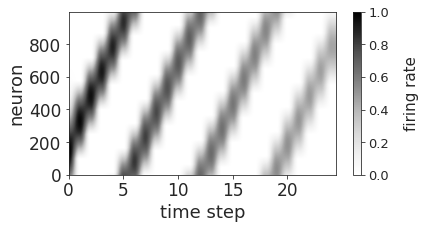

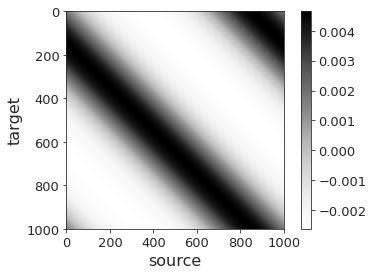

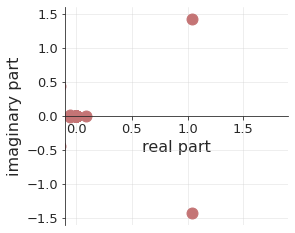

In [16]:
for shift_i, shift in enumerate(shift_vals):
    
    parameter_setting = (True, 0, 0, shift) + static_parameters
    net = manage.load_data(parameter_setting)
    
    shift_ind = np.where(shift_percent==shift)[0][0]
    evals = evals_W[no_rescale_ind, no_perc_ind, shift_ind, seed_ind]
    
    fname = 'shift=' + str(shift) + '.pdf'
     
    plotter = Plot()
    if save_figs_flag:
        plotter.activity_raster(net.R, fig_dir + 'activity_' + fname)
        plotter.weight_matrix(net.W, fig_dir + 'weight_matrix_' + fname)
        plotter.eigenspectrum(evals, storage_loc=fig_dir + 'eigenspectrum_' + fname, color=palette[0], alpha=1)
    else:
        plotter.activity_raster(net.R)
        plotter.weight_matrix(net.W)
        plotter.eigenspectrum(evals, color=palette[0], alpha=1)
        

## Shift, speed, and imaginary part of eigenvalues

In [17]:
dist_travelled = manage.load('dist_travelled', manage.bump_dir)

In [18]:
# n_perc_sel, n_shifts, n_seeds, n_timesteps
avg_speed_over_time = np.mean(dist_travelled[0,:,:,:], axis=2)
mean_speed = np.mean(avg_speed_over_time, axis=1)

In [19]:
max_imag_eval = [np.max(np.abs(evals_W[no_rescale_ind, no_perc_ind, i, seed_ind].imag)) for i in range(len(shift_percent))]

In [20]:
max_real_eval = [np.max(np.abs(evals_W[no_rescale_ind, no_perc_ind, i, seed_ind].real)) for i in range(len(shift_percent))]

In [21]:
max_abs_eval = [np.max(np.abs(evals_W[no_rescale_ind, no_perc_ind, i, seed_ind])) for i in range(len(shift_percent))]

In [22]:
linewidth=5

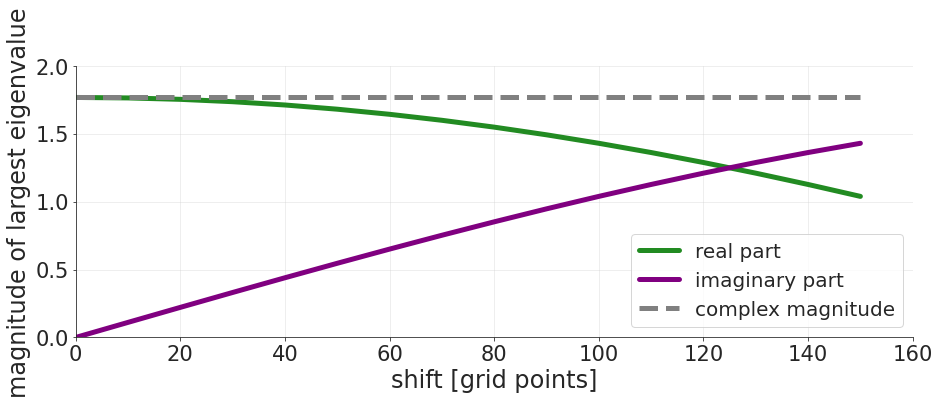

In [23]:
figsize=(15,5)
fig, ax = plt.subplots(figsize=figsize)
plt.plot(N*shift_percent, max_real_eval, color='forestgreen', linewidth=linewidth, label='real part')
plt.plot(N*shift_percent, max_imag_eval, color='purple', linewidth=linewidth, label='imaginary part')
plt.plot(N*shift_percent, max_abs_eval, color='grey', linestyle='--', linewidth=linewidth, label='complex magnitude')
plt.xlabel('shift [grid points]', fontsize=labelsize)
plt.ylabel('magnitude of largest eigenvalue', fontsize=labelsize)
ax.tick_params(axis='both', which='major', labelsize=ticksize)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.spines['bottom'].set_position('center')

plt.grid(alpha=0.4)
plt.xlim(0,160)
plt.ylim(0,2)
plt.legend(fontsize=20)

storage_loc = fig_dir + 'magnitude_of_eigenvalues_vs_shift.pdf'
plt.savefig(storage_loc, bbox_inches="tight")
plt.show()

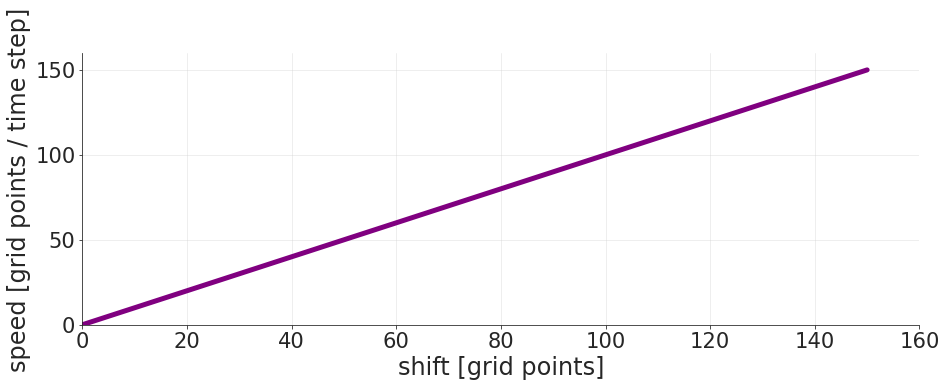

In [24]:
figsize=(15,5)
fig, ax = plt.subplots(figsize=figsize)
plt.plot(N*shift_percent, N*mean_speed, color='purple', linewidth=linewidth)
plt.xlabel('shift [grid points]', fontsize=labelsize)
plt.ylabel('speed [grid points / time step]', fontsize=labelsize)
ax.tick_params(axis='both', which='major', labelsize=ticksize)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.spines['bottom'].set_position('center')

plt.grid(alpha=0.4)
plt.xlim(0,160)
plt.ylim(0,160)

storage_loc = fig_dir + 'speed_vs_shift.pdf'
plt.savefig(storage_loc, bbox_inches="tight")
plt.show()

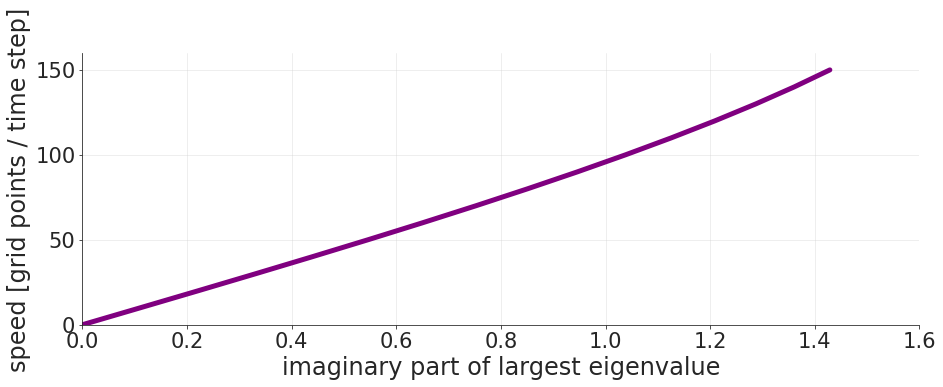

In [25]:
figsize=(15,5)
fig, ax = plt.subplots(figsize=figsize)
plt.plot(max_imag_eval, N*mean_speed, color='purple', linewidth=linewidth)
plt.xlabel('imaginary part of largest eigenvalue', fontsize=labelsize)
plt.ylabel('speed [grid points / time step]', fontsize=labelsize)
ax.tick_params(axis='both', which='major', labelsize=ticksize)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.spines['bottom'].set_position('center')

plt.grid(alpha=0.4)
plt.xlim(0,1.6)
plt.ylim(0,160)

storage_loc = fig_dir + 'speed_vs_magnitude_of_eigenvalues.pdf'
plt.savefig(storage_loc, bbox_inches="tight")
plt.show()